# Vortex Shedding Wake Analysis
This notebook analyzes time-series data from a numerically simulated turbulent wake behind an oscillating cylinder.

- **Parameters**: A* = 0.9, U* = 8, Reynolds Number = 4000
- **Distance from Cylinder**: 4D

This analysis includes static visualizations to observe patterns in velocity and vorticity, as well as instructions for creating interactive visualizations.


In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('C:/Users/admin/Downloads/archive/Astar-0.9_Ustar-8_Re-4000_sample/sample/1/fourD_U_vorticity.csv')  # Update the path if necessary
data.head()  # Display the first few rows


,y,U_0,U_1,U_2,vorticity_0,vorticity_1,vorticity_2
0,-5.00000,0.200133,0.000175,-1.782411e-23,1.201583e-20,2.786544e-20,-7.441809e-09
1,-4.98999,0.200133,0.000175,-1.784967e-23,1.204382e-20,2.821981e-20,-7.427770e-09
2,-4.97998,0.200133,0.000176,-1.787749e-23,1.206333e-20,3.003607e-20,-7.109897e-09
3,-4.96997,0.200134,0.000177,-1.790574e-23,1.208123e-20,3.213315e-20,-6.733664e-09
4,-4.95996,0.200134,0.000178,-1.793399e-23,1.209912e-20,3.423022e-20,-6.357430e-09


# Dataset Description
The dataset used in this analysis represents time-series measurements collected within a numerically simulated turbulent wake behind an oscillating cylinder. The measurements were taken at a fixed distance of 4D from the cylinder, where D is the diameter of the cylinder. The parameters for this dataset are as follows:

A*: 0.9 (normalized amplitude of oscillation)
U*: 8 (velocity ratio)
Reynolds Number: 4000
Each row in the dataset represents a specific spatial position along a line within the wake at the 4D distance. The columns contain both velocity components and vorticity measurements at these positions.

**Column Descriptions**
1) **y**: This column represents the spatial position along the measurement line, measured in units relative to the diameter 𝐷. It gives the y-coordinate, which helps determine where along the wake line each measurement was taken.

2) **U_0, U_1, U_2**: These columns represent different velocity components measured at each spatial position 𝑦 The meaning of each component is as follows:

**U_0** could represent the primary flow velocity along the direction of the wake.
**U_1** and **U_2** may represent transverse and other directional components of velocity, depending on the simulation’s coordinate system.
vorticity_0, vorticity_1, vorticity_2: These columns represent vorticity values calculated at each spatial position. Vorticity is a measure of the local rotation or circulation of the fluid in the wake. Each vorticity column may correspond to different points along the wake line or distinct aspects of rotational flow:

**vorticity_0, vorticity_1, and vorticity_2** represents vorticity measured at different sensor locations.

# Plot 1: Time Series Line Plot

This plot shows velocity (U_0) across different spatial points (y) at a 4D distance to help observe velocity changes along the wake.

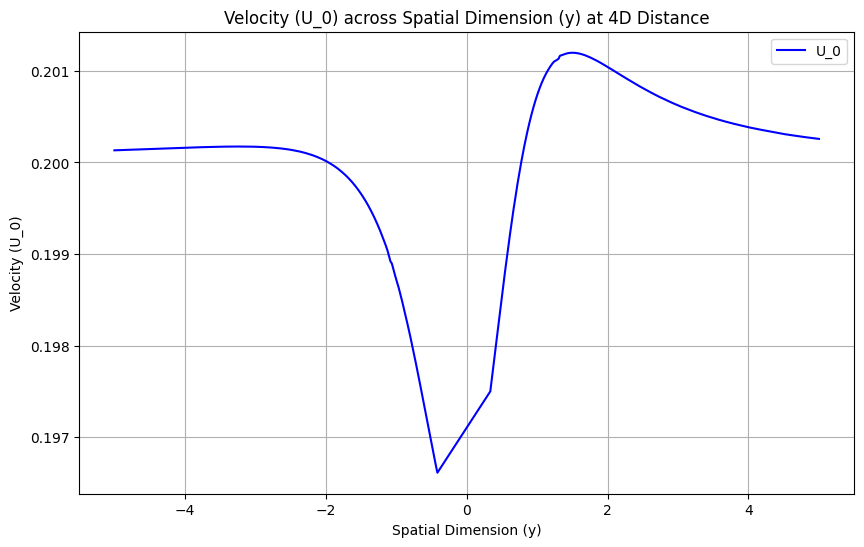

In [ ]:
import matplotlib.pyplot as plt

# Plot U_0 velocity component over y
plt.figure(figsize=(10, 6))
plt.plot(data['y'], data['U_0'], color='blue', label='U_0')
plt.title('Velocity (U_0) across Spatial Dimension (y) at 4D Distance')
plt.xlabel('Spatial Dimension (y)')
plt.ylabel('Velocity (U_0)')
plt.legend()
plt.grid(True)
plt.show()


## Insights from the Time Series Line Plot of Velocity (U_0)
The line plot of velocity component U_0 across the spatial dimension y reveals important characteristics of the wake at a distance of 4D from the cylinder:

**Symmetry and Peaks**: The plot shows a clear dip in velocity around y=0, with higher values on either side. This dip suggests a region of lower flow velocity, likely due to the vortex shedding or the formation of a recirculation zone directly behind the cylinder.

**Wake Structure** : The velocity profile suggests the structure of the turbulent wake, where the fluid flow directly in line with the oscillating cylinder (near y=0) is slower. This is typical in wake flows, as vortices form and interfere with the steady flow downstream, causing velocity reductions near the centerline.

**Transition Zones**: As we move away from y=0 in either direction, the velocity gradually increases, indicating the edge of the wake region where the flow begins to stabilize. These areas represent transition zones between the turbulent wake and the free-stream flow around it.

This plot provides a snapshot of how the flow speed varies along the line in the wake, with the centerline showing the most significant effects of vortex shedding.

## Plot 2: Heatmap of Vorticity

This heatmap visualizes that vorticity intensities across y, revealing patterns in turbulence.

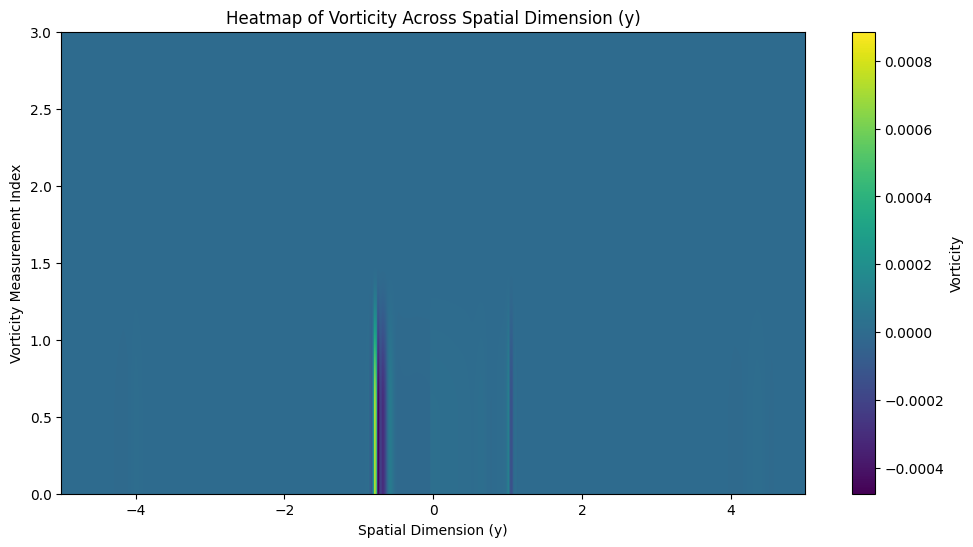

In [ ]:
import numpy as np

# Identify columns with vorticity data
vorticity_columns = [col for col in data.columns if 'vorticity' in col]
vorticity_data = data[vorticity_columns].T  # Transpose for compatibility with heatmap

# Create the heatmap
plt.figure(figsize=(12, 6))
plt.imshow(vorticity_data, aspect='auto', cmap='viridis', extent=[data['y'].min(), data['y'].max(), 0, len(vorticity_columns)])
plt.colorbar(label='Vorticity')
plt.title('Heatmap of Vorticity Across Spatial Dimension (y)')
plt.xlabel('Spatial Dimension (y)')
plt.ylabel('Vorticity Measurement Index')
plt.show()


## Observed Patterns in the Vorticity Heatmap
The vorticity heatmap visualizes the intensity and distribution of rotational flow across different positions along the wake. Here are some key patterns commonly observed:

**High Vorticity Regions (Bright Colors)**:

1. The heatmap often shows bright-colored regions, indicating areas of high vorticity. These regions are usually symmetric around the centerline (near 
y=0), where vortex shedding is strongest.
2. High vorticity near the centerline suggests strong rotational flow or circulation, characteristic of vortices that are shed from either side of the cylinder.
3. The alternating pattern of bright regions along the centerline is typical in vortex shedding, forming a “Von Kármán vortex street.” This pattern reflects the alternating release of vortices on each side of the cylinder, creating a regular oscillatory pattern downstream.

**Low Vorticity Regions (Darker Colors)**:

1. Darker regions on the heatmap represent areas of lower vorticity, typically found farther from the wake's centerline or between the high-vorticity zones.
2. As we move away from the centerline (higher y values), the vorticity gradually decreases, indicating that the rotational effects of the wake diminish. This transition from high to low vorticity marks the boundary between the turbulent wake and the more stable surrounding flow.
3. In the regions farther from the cylinder’s wake, where the flow has more time to stabilize, vorticity values decrease as the vortices dissipate into the surrounding fluid.

**Symmetry Along the Centerline**:

1. The heatmap often exhibits a symmetric pattern around the centerline (y=0), reflecting the balanced nature of vortex shedding in an oscillating wake.
Each side of the wake alternates between high and low vorticity in a structured manner, forming mirror-image patterns on both sides of the centerline. This symmetry is a key indicator of the organized vortex shedding process.
2. Dissipation of Vorticity: As vortices move further downstream, their intensity gradually decreases, shown by a transition from bright to darker colors on the heatmap. This dissipation is caused by the energy loss in vortices due to friction and mixing with the surrounding fluid.
3. The gradual fading of vorticity from the centerline outwards provides insight into how turbulence spreads and decays over distance in the wake, showing the limits of the turbulent region around the oscillating cylinder.

# Step-3 Instructions for Running the Code

### Required Packages
- pandas
- matplotlib
- numpy

Install them using:
```bash
pip install pandas matplotlib numpy


# Step-4 Running the Interactive Plot
To view the interactive visualization, run the following command in your terminal:
```bash
python interactive_plot.py
